#🐶 End-to-end Multil-class Dog Breed Classification
This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.
##1. Problem
Identifying the breed of a dog given an image of a dog.
When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.
##2. Data
The data we're using is from Kaggle's dog breed identification competition.
https://www.kaggle.com/c/dog-breed-identification/data
##3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image.
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation
##4. Features
Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them). 

In [0]:
#unzip the uploaded file
#!unzip "drive/My Drive/Dog Vision/dog-breed-identification.zip" -d "drive/My Drive/Dog Vision/"

## Getting our Workkspace Ready
* Import TensorFlow 2.x ✅
* Import TensorFlow Hub ✅
* Make sure we're using a GPU ✅

In [0]:
# Import TF 2.x
try:
 # %tensorflow_version only exists in Colab
 %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
#Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

#Check for GPU availability
print( "Yes access to GPU is available" if tf.config.list_physical_devices("GPU") else "not available")

TF version: 2.1.0
TF Hub version: 0.7.0
Yes access to GPU is available


## Getting our data ready (turning into Tensors)
With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (numerical representations).
Let's start by accessing our data and checking out the labels.

In [0]:
#Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/My Drive/Dog Vision/labels.csv")
labels_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     2c64e362c9aa29450082291264dcba29  scottish_deerhound
freq                                   1                 126

In [0]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

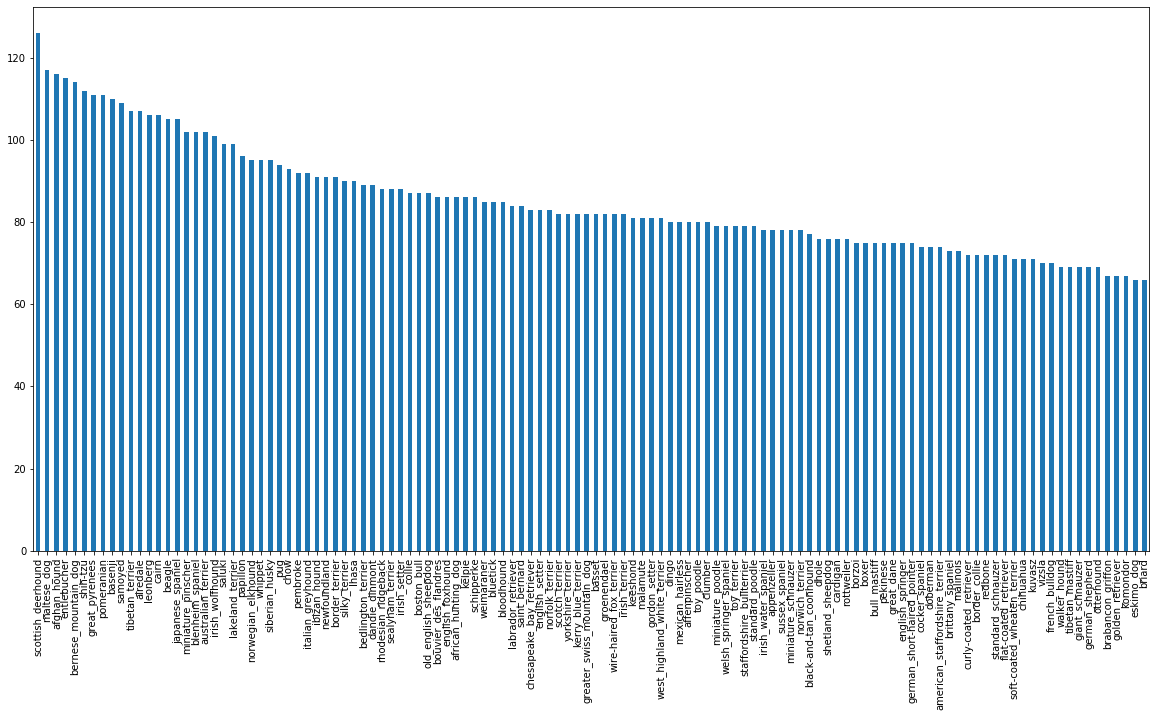

In [0]:
#How many images are there of each breed?
labels_csv['breed'].value_counts().plot.bar(figsize = (20,10))

In [0]:
labels_csv['breed'].value_counts().median()

82.0

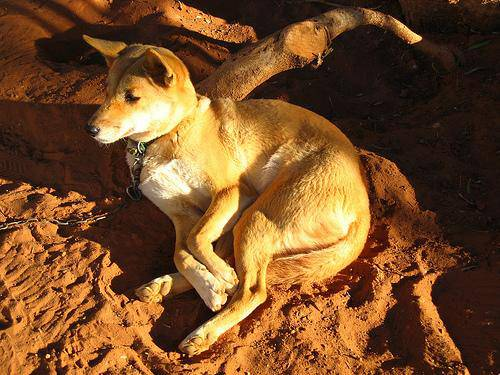

In [0]:
# Lets view an image
from IPython.display import Image
Image('drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg')

# Getting images and their labels¶ 
Let's get a list of all of our image file pathnames.

In [0]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [0]:
# Create pathnames from image ID's
filenames = ["drive/My Drive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10 
filenames


['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/My Drive/Dog Vision/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/My Drive/Dog Vision/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'drive/My Drive/Dog Vision/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'drive/My Drive/Dog Vision/train/006cc3ddb9dc1bd82

In [0]:
# Check whetehr number of filenames matches number of actual image files
import os
if len(os.listdir('drive/My Drive/Dog Vision/train/')) == len(filenames):
  print ("File names match the actual amount of files!")
else:
  print("Filenames do not match the actual amount of files check the target directory ")


KeyboardInterrupt: ignored

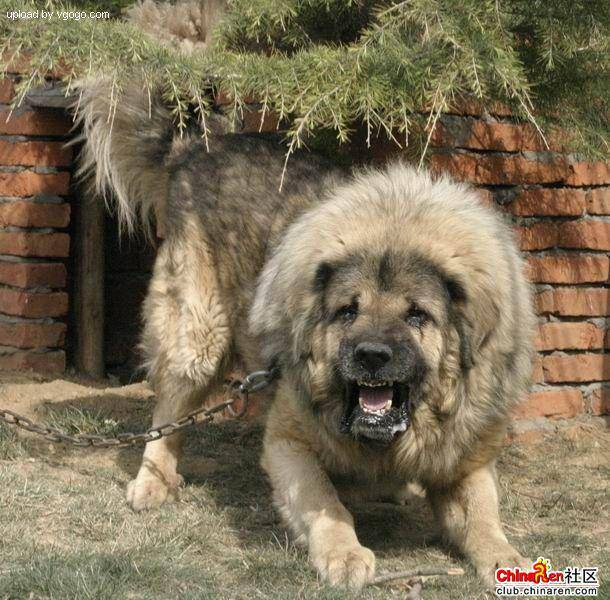

In [0]:
#One more check
Image(filenames[9000])

In [0]:
labels_csv['breed'][9000]

'tibetan_mastiff'

Now we've got our image filepaths together, let's get the labels.
We'll take them from labels_csv and turn them into a NumPy array.

In [0]:
import numpy as np
labels = labels_csv["breed"].to_numpy() # convert labels column to NumPy array
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [0]:
len(labels)

10222

In [0]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print( "Number of labels matches number of filenames!")
else:
  print("Number of labels does not matches number of filenames!")

Number of labels matches number of filenames!


In [0]:
#Find the unique lable values
unique_breed = np.unique(labels)
len(unique_breed)

120

In [0]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0]==unique_breed

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [0]:
#Turn every label into a boolean array
boolean_labels = [labels == unique_breed  for labels in labels]
boolean_labels[:1]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False])]

In [0]:
# Example : Turning boolean araay into integers
print(labels[0])# orignal label
print(np.where(unique_breed==labels[0])) #index where label occurs
print(boolean_labels[0].argmax()) #index where label occurs in boolean array
print(boolean_labels[0].astype(int)) #there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [0]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


##Creating our own validation set
Since the dataset from Kaggle doesn't come with a validation set (a split of the data we can test our model on before making final predicitons on the test set), let's make one.
We could use Scikit-Learn's train_test_split function or we could simply make manual splits of the data.
For accessibility later, let's save our filenames variable to X (data) and our labels to y.

In [0]:
# Setup X and y variables
X = filenames
y = boolean_labels

Since we're working with 10,000+ images, it's a good idea to work with a portion of them to make sure things are working before training on them all.
This is because computing with 10,000+ images could take a fairly long time. And our goal when working through machine learning projects is to reduce the time between experiments.
Let's start experimenting with 1000 and increase it as we need.


In [0]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

1000


Now let's split our data into training and validation sets. We'll use and 80/20 split (80% training data, 20% validation data).

In [0]:
# Lets split our data into train and validation sets
from sklearn.model_selection import train_test_split

#Split them into training and validation of tital size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size = 0.2,
                                                  random_state=42)


len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [0]:
#Lets look at the training data
X_train[:1], y_train[:1]

(['drive/My Drive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fal

## Preprocessing Images (Turning Images into Tensors)

Our labels are in numeric format but our images are still just file paths.


Since we're using TensorFlow, our data has to be in the form of Tensors.


A Tensor is a way to represent information in numbers. If you're familar with NumPy arrays (you should be), a Tensor can be thought of as a combination of NumPy arrays, except with the special ability to be used on a GPU.


Because of how TensorFlow stores information (in Tensors), it allows machine learning and deep learning models to be run on GPUs (generally faster at numerical computing).

To preprocess our images into Tensors we're going to write a function which does a few things:
1. Takes an image filename as input.
2. Uses TensorFlow to read the file and save it to a variable, image.
3. Turn our image (a jpeg file) into Tensors.
4. Resize the image to be of shape (224, 224).
5. Return the modified image.

A good place to read about this type of function is the TensorFlow documentation on loading images.
https://www.tensorflow.org/tutorials/load_data/images

You might be wondering why (224, 224), which is (heigh, width). It's because this is the size of input our model (we'll see this soon) takes, an image which is (224, 224, 3).

What? Where's the 3 from? We're getting ahead of ourselves but that's the number of colour channels per pixel, red, green and blue.
Let's make this a little more concrete.

In [0]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42]) # read in an image
image.shape

(257, 350, 3)

Notice the shape of image. It's (257, 350, 3). This is height, width, colour channel value.
And you can easily convert it to a Tensor using tf.constant().

In [0]:
#Turn image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Ok, now let's build a function we were talking about.

In [0]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

## Creating data batches
Wonderful. Now we've got a function to convert our images into Tensors, we'll now build one to turn our data into batches (more specifically, a TensorFlow BatchDataset).

What's a batch?
A batch (also called mini-batch) is a small portion of your data, say 32 (32 is generally the default batch size) images and their labels. In deep learning, instead of finding patterns in an entire dataset at the same time, you often find them one batch at a time.

Let's say you're dealing with 10,000+ images (which we are). Together, these files may take up more memory than your GPU has. Trying to compute on them all would result in an error.

Instead, it's more efficient to create smaller batches of your data and compute on one batch at a time.

TensorFlow is very efficient when your data is in batches of (image, label) Tensors. So we'll build a function to do create those first. We'll take advantage of of process_image function at the same time.

In [0]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

Now we've got a simple function to turn our image file path names and their associated labels into tuples (we can turn these into Tensors next), we'll create a function to make data batches.

Because we'll be dealing with 3 different sets of data (training, validation and test), we'll make sure the function can accomodate for each set.

We'll set a default batch size of 32 because according to Yann Lecun (one of the OG's of deep learning), friends don't let friends train with batch sizes over 32.

In [0]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch


In [0]:
# Create training and testing validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [0]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

# Visualizing Data Batches

Our data is now in batches, however, these can be a little hard to understant/comprehend lets visualize it

In [0]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breed[labels[i].argmax()], color = "white" )
    # Turn gird lines off
    plt.axis("off")
    
    

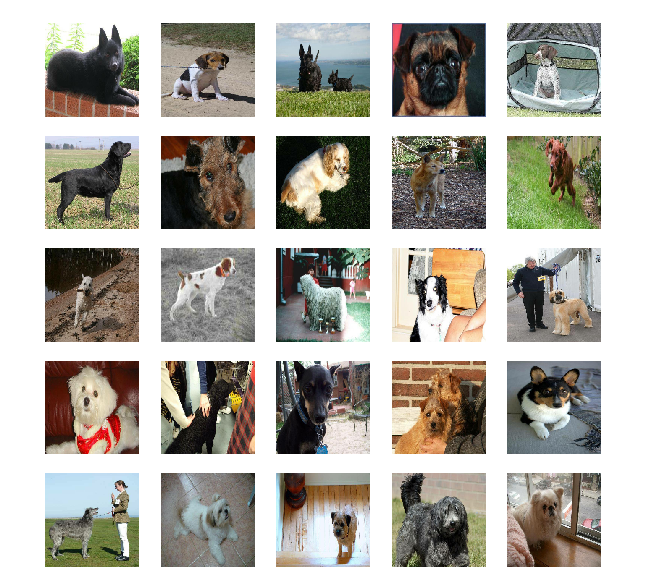

In [0]:
#Now lets visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

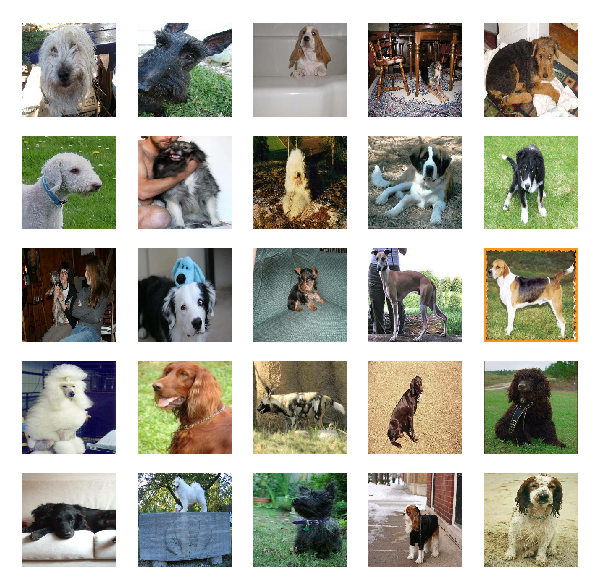

In [0]:
# Visualize validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

# Building a Model

Before we build a model, there  are a few things we need to define

* The input shape (our image shape, in the form of Tensors) to our model
* The ouput  shape (image, labels, in the form of tensors) of our model.
* The url of the model we want to use

In [0]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breed) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we've got the inputs, outputs and model we're using ready to go. We can start to put them together
There are many ways of building a model in TensorFlow but one of the best ways to get started is to use the Keras API.

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen's URL as parameters.
* Defines the layers in a Keras model in a sequential fashion (do this first, then this, then that).
Compiles the model (says how it should be evaluated and improved).
* Builds the model (tells it what kind of input shape it'll be getting).
Returns the model.
* Returns the model

In [0]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

In [0]:
# Create a model and check its details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress ,check its progress or stop training early if a model stops Improving

We will make 2 callbacs. One Tensorboard which helps track our model progress and another one for stoping the model from training too long before it overfits

### Tesorboard
To setup a Tensorboard call back we need to do 3 things
1. Load Tensorbooard notebook extension
2. Create a Tensorboard callback which is able to save logs
3. Visualize our model training logs with '%tensorboard' magic function

In [0]:
# Load Tensorboard notebook extension
%load_ext tensorboard


In [0]:
import datetime

#Create a fucntion to build a Tensorboard callback
def create_tensorboard_callback():
  #create a log direcory for storing logs
  logdir = os.path.join("drive/My Drive/Dog Vision/logs",
                        #Make it so the logs get racked whenever we run an experiment
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping callback

Early stopping helps prevent overfitting by stopping a model when a certain evaluation metric stops improving. If a model trains for too long, it can do so well at finding patterns in a certain dataset that it's not able to use those patterns on another dataset it hasn't seen before (doesn't generalize).

It's basically like saying to our model, "keep finding patterns until the quality of those patterns starts to go down."
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [0]:
# Create early stopping callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

# Training a model (on subset of data)

Our first model will only train on 1000 images, to make sure everything is working

In [0]:
NUM_EPOCHS =100 #@param {type:'slider', min:10, max:100, step:10}


In [0]:
# Check to make sure we are still using a GPU
print("GPU is available" if tf.config.list_logical_devices("GPU") else "not available")

GPU is available


### Funcion that will train our model

* Create a model using `create_tensorboard_callback()`
* Setuip a Tensorboard `callback using create_model()`
* Call the `fit()` function on our model passing it the training data, validation data
* Return the model

In [0]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  
  return model


In [0]:
# Fit the model to the data
%timeit
model =train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Train for 25 steps, validate for 7 steps
Epoch 1/100
25/25 [==============================] - 291s 12s/step - loss: 4.4669 - accuracy: 0.1013 - val_loss: 3.2397 - val_accuracy: 0.2600
Epoch 2/100
25/25 [==============================] - 5s 186ms/step - loss: 1.5523 - accuracy: 0.7163 - val_loss: 2.0763 - val_accuracy: 0.5400
Epoch 3/100
25/25 [==============================] - 5s 183ms/step - loss: 0.5292 - accuracy: 0.9350 - val_loss: 1.6131 - val_accuracy: 0.6050
Epoch 4/100
25/25 [==============================] - 5s 185ms/step - loss: 0.2373 - accuracy: 0.9937 - val_loss: 1.4454 - val_accuracy: 0.6850
Epoch 5/100
25/25 [==============================] - 5s 190ms/step - loss: 0.1367 - accuracy: 0.9962 - val_loss: 1.3723 - val_accuracy: 0.6850
Epoch 6/100
25/25 [==============================] - 5s 185ms/step - loss: 0.0948 - accuracy: 1.0000 - val_loss: 1.3298 - val_accuracy: 0.6750
Epoch 7/

#### Note: Overfitting to begin with is a good thing. It means our model is learning something.

### Checking the TensorBoard logs
Now our model has been trained, we can make its performance visual by checking the TensorBoard logs.
The TensorBoard magic function (%tensorboard) will access the logs directory we created earlier and viualize its contents.

In [0]:

%tensorboard --logdir drive/My\ Drive/DogVision/logs

<IPython.core.display.Javascript object>

In [0]:
## Make predictions on validation data (not used for training the model)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 191ms/step


array([[8.6387427e-04, 3.7687842e-05, 4.9972656e-04, ..., 3.7144209e-04,
        4.6062478e-06, 4.8357595e-04],
       [1.8967339e-03, 9.9479186e-04, 6.6493959e-03, ..., 1.2233173e-03,
        8.6173499e-03, 4.2534503e-04],
       [7.3649107e-06, 5.1068288e-05, 1.9004430e-04, ..., 7.7582162e-04,
        6.4540916e-05, 3.4241320e-03],
       ...,
       [1.1356998e-05, 3.5178364e-04, 4.3982476e-05, ..., 1.4295275e-05,
        2.3562755e-04, 2.8684268e-05],
       [1.7565167e-02, 4.3992861e-04, 2.9995231e-04, ..., 4.3513166e-04,
        1.0869424e-04, 7.9495683e-03],
       [1.5675409e-04, 2.6369637e-05, 5.4158142e-04, ..., 2.8950255e-03,
        1.9861520e-03, 3.4502399e-04]], dtype=float32)

In [0]:
predictions.shape

(200, 120)

In [0]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breed[np.argmax(predictions[0])]}") # the predicted label

[8.63874273e-04 3.76878415e-05 4.99726564e-04 6.06941649e-05
 2.24457865e-04 3.36141857e-05 1.00066485e-02 6.09481649e-05
 2.46281037e-04 1.35253329e-04 6.31748117e-05 1.30938533e-05
 4.14014939e-04 2.62746733e-04 1.79948146e-03 1.40035269e-03
 3.45931803e-05 2.60161221e-01 1.08376416e-05 3.92768234e-05
 3.13570228e-04 2.60419969e-04 1.73581357e-05 5.60721790e-04
 4.58282593e-05 5.53336577e-05 4.07894343e-01 2.23491545e-04
 1.20763034e-04 3.03809211e-04 2.60239012e-05 2.55187915e-04
 7.79538095e-05 1.30155851e-04 7.79738912e-05 5.09590842e-02
 3.07303344e-05 2.11760853e-04 7.64798824e-05 2.79160558e-05
 8.61051434e-04 1.53481210e-06 1.22865909e-04 4.08492197e-05
 3.85160347e-05 5.44736031e-05 6.74493785e-05 2.19393638e-04
 2.30775666e-04 2.19278474e-04 2.00548806e-04 3.89469387e-05
 2.13337058e-04 2.53922008e-05 1.83434386e-04 1.25869528e-05
 7.55863439e-05 1.60242850e-03 2.78998894e-04 8.30124021e-02
 2.79931963e-04 1.68679908e-05 3.11078649e-04 6.38953361e-06
 4.25560196e-04 3.702071

Having this information is great but it would be even better if we could compare a prediction to its true label and original image.

To help us, let's first build a little function to convert prediction probabilities into predicted labels.

**Note**: Prediction probabilities are also known as confidence levels.

In [0]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breed[np.argmax(prediction_probabilities)]

#Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'golden_retriever'

In [0]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

Now we've got a list of all different predictions our model has made, we'll do the same for the validation images and validation labels.

In [0]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breed[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [0]:
images_ = []
labels_ = []

# Loop through unbatched data
for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)
  
  images_[0],labels_[0]

In [0]:
get_pred_label(labels_[0])

'cairn'

Now we have got ways to get
* Prediction labels
* Validation labes (truth labels)
* Validation image

Lets make some function to make these all a bit more visual

More specifically, we want to be able to view an image, its predicted label and its actual label (true label).
The first function we'll create will:
* Take an array of prediction probabilities, an array of truth labels, an array of images and an integer.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and target image on a single plot

In [0]:

def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "white"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

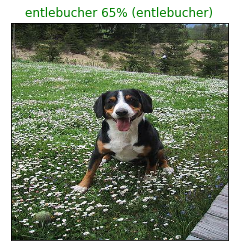

In [0]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=97)

Since we're working with a multi-class problem (120 different dog breeds), it would also be good to see what other guesses our model is making. More specifically, if our model predicts a certain label with 24% probability, what else did it predict?

Let's build a function to demonstrate. The function will:
* Take an input of a prediction probabilities array, a ground truth labels array and an integer.
* Find the predicted label using get_pred_label().

* Find the top 10:
** Prediction probabilities indexes
** Prediction probabilities values
** Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green.

In [0]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breed[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             color = "white",
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

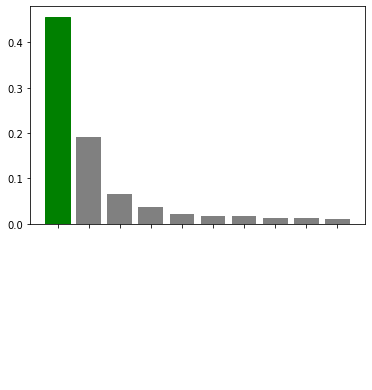

In [0]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=50)

Now we have got some functions to help us visualize our predictions and evaluate our model, lets check out a few

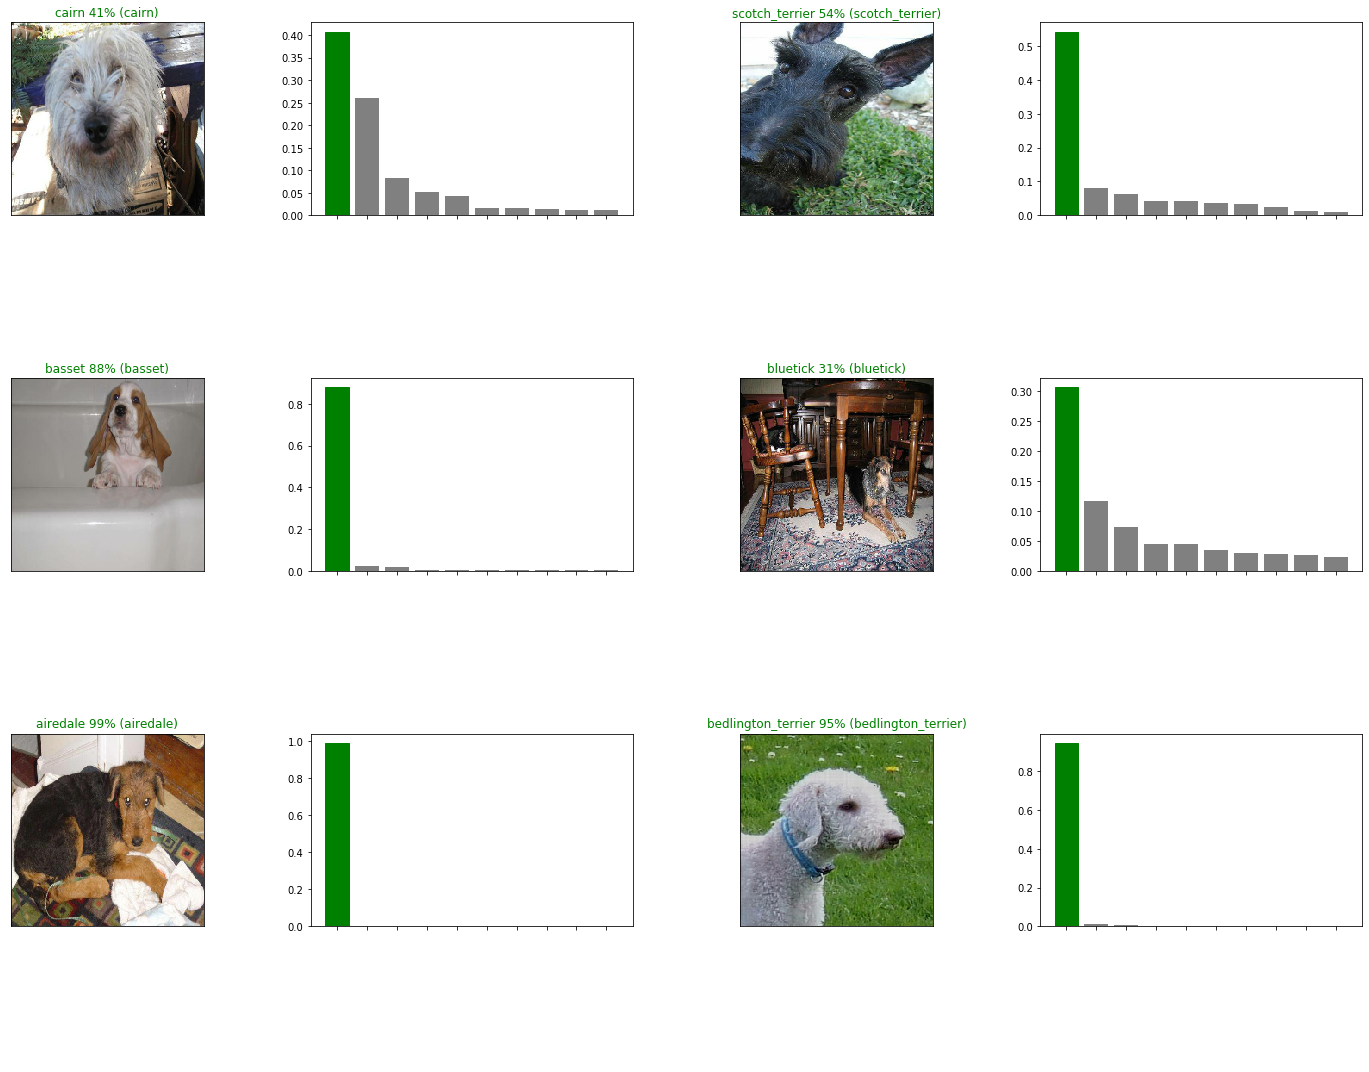

In [0]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

# Saving and reloading a model

In [0]:

def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("drive/My Drive/Dog Vision/model",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [0]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [0]:
 # Save our model trained on 1000 images
save_model(model, suffix="1000-images-Adam")

Saving model to: drive/My Drive/Dog Vision/model/20200301-20391583095176-1000-images-Adam.h5...


'drive/My Drive/Dog Vision/model/20200301-20391583095176-1000-images-Adam.h5'

In [0]:
# Load our model trained on 1000 images
model_1000_images = load_model('drive/My Drive/Dog Vision/model/20200301-20391583095176-1000-images-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/model/20200229-04041582949065-1000-images-Adam.h5


# Training our model on a full 🐶 dataset




In [0]:
# Create a data batch with the ful data set
full_data = create_data_batches(X,y)

Creating training data batches...


In [0]:
# Create a model for the full dataset
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [0]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training all data.. so we cant monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy', patience=3)

In [0]:
# Fit the full model to the full training data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, 
                          full_model_early_stopping])

Train for 320 steps
Epoch 1/100
320/320 [==============================] - 3103s 10s/step - loss: 1.3394 - accuracy: 0.6696
Epoch 2/100
320/320 [==============================] - 52s 162ms/step - loss: 0.3979 - accuracy: 0.8809
Epoch 3/100
320/320 [==============================] - 51s 159ms/step - loss: 0.2341 - accuracy: 0.9377
Epoch 4/100
320/320 [==============================] - 52s 162ms/step - loss: 0.1531 - accuracy: 0.9652
Epoch 5/100
320/320 [==============================] - 53s 165ms/step - loss: 0.1051 - accuracy: 0.9783
Epoch 6/100
320/320 [==============================] - 52s 164ms/step - loss: 0.0787 - accuracy: 0.9857
Epoch 7/100
320/320 [==============================] - 52s 164ms/step - loss: 0.0590 - accuracy: 0.9908
Epoch 8/100
320/320 [==============================] - 52s 164ms/step - loss: 0.0451 - accuracy: 0.9954
Epoch 9/100
320/320 [==============================] - 53s 164ms/step - loss: 0.0368 - accuracy: 0.9964
Epoch 10/100
320/320 [======================

In [0]:
 # Save our model trained on full images
save_model(model, suffix="full-images-Adam")

Saving model to: drive/My Drive/Dog Vision/model/20200301-22191583101183-full-images-Adam.h5...


'drive/My Drive/Dog Vision/model/20200301-22191583101183-full-images-Adam.h5'

In [0]:
# Load our model trained on full images
full_model = load_model('drive/My Drive/Dog Vision/model/20200301-22191583101183-full-images-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/model/20200301-22191583101183-full-images-Adam.h5


# Making predicions on test dataset

Now we know our model works on a subset of the data, we can start to move forward with training one on the full data.

Above, we saved all of the training filepaths to X and all of the training labels to y. Let's check them out.

In [0]:
len(X)

10222

There we go! We've got over 10,000 images and labels in our training set.
Before we can train a model on these, we'll have to turn them into a data batch.

The beautiful thing is, we can use our `create_data_batches()` function from above which also preprocesses our images for us (thank you past us for writing a helpful function).

In [0]:
# Load test image filenames
test_path = "drive/My Drive/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/My Drive/Dog Vision/test/ef413ae9b0de80605bc95de2d12a4082.jpg',
 'drive/My Drive/Dog Vision/test/f10c58048410333d9c4156046b0ea54f.jpg',
 'drive/My Drive/Dog Vision/test/ef7462aaef0907fbe406e23a4462f086.jpg',
 'drive/My Drive/Dog Vision/test/ed77c2de9938730ef8e9d11c718dda38.jpg',
 'drive/My Drive/Dog Vision/test/f14c06e952a3d1d4e6a5b1c9e1384926.jpg',
 'drive/My Drive/Dog Vision/test/f2dd8cf1ced495252a890e6633b65018.jpg',
 'drive/My Drive/Dog Vision/test/ea280d6cb873df2eb683f0a5f13e3dce.jpg',
 'drive/My Drive/Dog Vision/test/f130fade46d3423c601a7b9a16a0333c.jpg',
 'drive/My Drive/Dog Vision/test/f1ba2c4a69ed34fea976f8fc6b77f45b.jpg',
 'drive/My Drive/Dog Vision/test/edf9eccee2542eb4fdc5757da38f0b46.jpg']

In [0]:
#Create test data batch
test_data = create_data_batches(test_filenames,test_data=True )

Creating test data batches...


In [0]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

**Note**: Since there are 10,000+ test images, making predictions could take a while, even on a GPU. So beware running the cell below may take up to an hour.

In [0]:
# Make predictions on test data batch using the loaded model
test_predictions = full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 4526s 14s/step


In [0]:
#Save prediction
np.savetxt('drive/My Drive/Dog Vision/preds_array.csv',test_predictions, delimiter=',')

In [0]:
# Load predictions numpy array from csv fiel
test_predictions = np.loadtxt('drive/My Drive/Dog Vision/preds_array.csv', delimiter=',')

## Preparing test dataset predictions for Kaggle

Looking at the Kaggle sample submission, it looks like they want the models output probabilities each for label along with the image ID's.
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

To get the data in this format, we'll:
* Create a pandas DataFrame with an ID column as well as a column for each dog breed.
* Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the prediction probabilities) to each of the dog breed columns using the unique_breeds list and the test_predictions list.
* Export the DataFrame as a CSV to submit it to Kaggle


In [0]:
#Create a pandas dataframe with empty columns
preds_df = pd.DataFrame(columns=['id'] + list(unique_breed))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [0]:
# Append test image ID's to predictions DataFrame
test_path = "drive/My Drive/Dog Vision/test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

id  ... yorkshire_terrier
0  ef413ae9b0de80605bc95de2d12a4082  ...               NaN
1  f10c58048410333d9c4156046b0ea54f  ...               NaN
2  ef7462aaef0907fbe406e23a4462f086  ...               NaN
3  ed77c2de9938730ef8e9d11c718dda38  ...               NaN
4  f14c06e952a3d1d4e6a5b1c9e1384926  ...               NaN

[5 rows x 121 columns]

In [0]:
# Add the predictions probabilities to each dog breed column
preds_df[list(unique_breed)] = test_predictions
preds_df.head()

id  ... yorkshire_terrier
0  ef413ae9b0de80605bc95de2d12a4082  ...       4.42872e-05
1  f10c58048410333d9c4156046b0ea54f  ...        0.00530412
2  ef7462aaef0907fbe406e23a4462f086  ...        0.00360846
3  ed77c2de9938730ef8e9d11c718dda38  ...       1.26828e-05
4  f14c06e952a3d1d4e6a5b1c9e1384926  ...       4.82239e-05

[5 rows x 121 columns]

In [0]:
#Saving 
preds_df.to_csv("drive/My Drive/Dog Vision/predictions1.csv", index= False)

## Making predictions with our own image

To do so, we'll:
* Get the filepaths of our own images.
* Turn the filepaths into data batches using create_data_batches(). And since our custom images won't have labels, we set the test_data parameter to True.
* Pass the custom image data batch to our model's predict() method.
* Convert the prediction output probabilities to prediction labels.
* Compare the predicted labels to the custom images.

In [0]:
# Get custom image filepaths
custom_path = "drive/My Drive/dogs/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [0]:
custom_image_paths

['drive/My Drive/dogs/Doberman Pinsher.jpg',
 'drive/My Drive/dogs/Siberian-Husky.jpg',
 'drive/My Drive/dogs/Karelian-Bear-Dog.jpg']

In [0]:
#Turn images into custom data batches
custom_data = create_data_batches(custom_image_paths, test_data= True)

Creating test data batches...


In [0]:
#Make predictions on custom images (my own)
custom_preds = full_model.predict(custom_data)

In [0]:
# Get custom image prediction label
custom_pred_label = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]

In [0]:
# Get custom images (our unbatchify() function won't work since there aren't labels)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

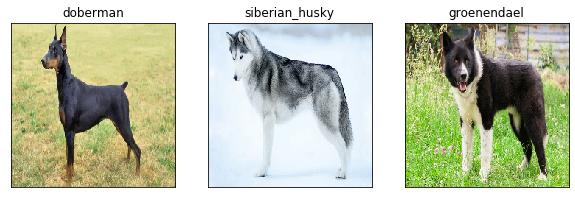

In [0]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_label[i])
  plt.imshow(image)